In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(421)

[262085.0, 46029.24999999997, 23072.391689499975, 17373.45893824165, 13882.257503619074, 11174.752603568157, 9012.45821595231, 7278.806555054628, 5887.546845905554, 4770.542473732314, 3873.6892867770543, 3152.9179283125713, 2573.293901248892, 2106.871374127577, 1731.2659916492396, 1428.5450518231887, 1184.339614053777, 987.1340404333084, 827.6974398038536, 698.6286227658062, 593.9918704310182, 509.0253669757967, 439.90777929743, 383.5713712035547, 337.5523615594506, 299.87109277231366, 268.9360612887235, 243.46704996226444, 222.43355274839604, 205.00544277381545, 190.5134434323777, 178.41744917956805, 168.28113244411753, 159.75158499174773, 152.5429917162566, 146.42353463899286, 141.2048848244824, 136.73376793205165, 132.88519159420935, 129.55700484249994, 126.66552547177092, 124.14202381166908, 121.92989347484084, 119.98237337030832, 118.26071228877484, 116.73268903826624, 115.3714185371762, 114.15580035216783, 113.08106548389634, 112.11543800134743, 111.24536133315964, 110.4592927944

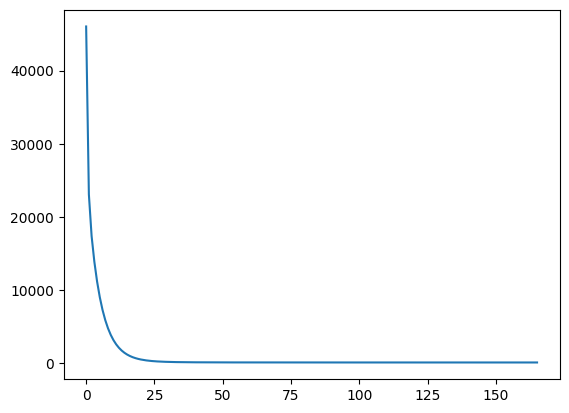

finX [[ 1.49981322  2.35518453  4.84202126  8.68162521 17.13664672 16.67545878]
 [ 2.35518453  3.05655205  5.20601308  8.73910169 17.1114077  16.65385541]
 [ 4.84202126  5.20601308  6.57338706  9.29544525 17.018227   16.57866519]
 [ 8.68162521  8.73910169  9.29544525 10.95601446 17.007305   16.60457762]
 [17.13664672 17.1114077  17.018227   17.007305   18.02966179 17.71184464]
 [16.67545878 16.65385541 16.57866519 16.60457762 17.71184464 17.39753136]]
3


In [22]:
def objective_function(x, A, b):
    term1 = np.sum((np.concatenate([A[:, i:i+1].T @ x @ A[:, i:i+1] - b[i] for i in range(x.shape[0])])) **2)
    term2 = np.sum(np.abs(np.linalg.eigvals(x)))
    return term1 + term2

def gradient_function(x, A, b):
    sum = np.zeros((6,6))
    for i in range(x.shape[0]):
        sum += A[:, i:i+1] @ ((A[:, i:i+1].T @ x @ A[:, i:i+1]) - b[i]) @ A[:, i:i+1].T
    # print("grad",sum)
    return sum

def soft_thresholding_operator(x, threshold):
    # print(np.abs(x))
    # print(np.abs(x) - threshold)
    # print(np.maximum(np.abs(x) - threshold, 0))
    # input()
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

def ISTA(A, b, x, lambda_ = 1):
    objValue = []

    # Find the largest eigenvalue
    L = 100
    k = 0
    while(1):
        # print(k)
        # print(x - ((1/L) * A.T @ (A @ x - b)))\
        z = x - ((1/L) * gradient_function(x, A, b))
        z_eigval, z_eigvec = np.linalg.eig(z)
        x_new = z_eigvec @ np.diag(soft_thresholding_operator(z_eigval, lambda_ / L)) @ z_eigvec.T
        # print("delta x", np.linalg.norm(x_new - x))
        # print(np.abs(objective_function(x_new, A, b)))
        if(np.linalg.norm(x_new - x) < 1e-2):
            break
        # print(objective_function(x, A, b))
        objValue.append(objective_function(x, A, b))
        x = x_new
        k+=1
    return x, objValue

# Create random matrix A
A = np.array([[1,0,0,0,0,0],[1,1,0,0,0,0],[1,1,1,0,0,0],[1,1,1,1,0,0],[1,1,1,1,1,0],[1,1,1,1,1,1]])
A = A.T

b = np.array([[1],[9],[36],[100],[255],[441]])

x = np.eye(6)
finX, objValues= ISTA(A, b, x, 1)

plt.plot(range(len(objValues) - 1), objValues[1:])
print(objValues)
plt.show()
print("finX", finX)
print(np.linalg.matrix_rank(finX))